# Intelligent Systems (SInt) - Assignment 2

Students:
- Pedro Geitoeira, No. 87489
- Eloy Marquesan Dones, No. 112861

**GitHub**: [SInt_G09](https://github.com/pedrogeitoeira/SInt_G09.git)

## Hair Dryer Dataset Problem

This is a **SISO regression** problem.

### Neural Network Model - Finding the Best Model Configurations

Configuration: 2 hidden layers with 5 nodes each
Mean Squared Error: 0.635
Mean Absolute Percentage Error: 15.3%
Explained Variance Score: 0.057
--------------------------------------------------
Configuration: 2 hidden layers with 10 nodes each
Mean Squared Error: 0.641
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.049
--------------------------------------------------
Configuration: 2 hidden layers with 15 nodes each
Mean Squared Error: 0.643
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 2 hidden layers with 20 nodes each
Mean Squared Error: 0.643
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.047
--------------------------------------------------
Configuration: 2 hidden layers with 25 nodes each
Mean Squared Error: 0.642
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.049
--------------------------------------------------
Configuration: 2

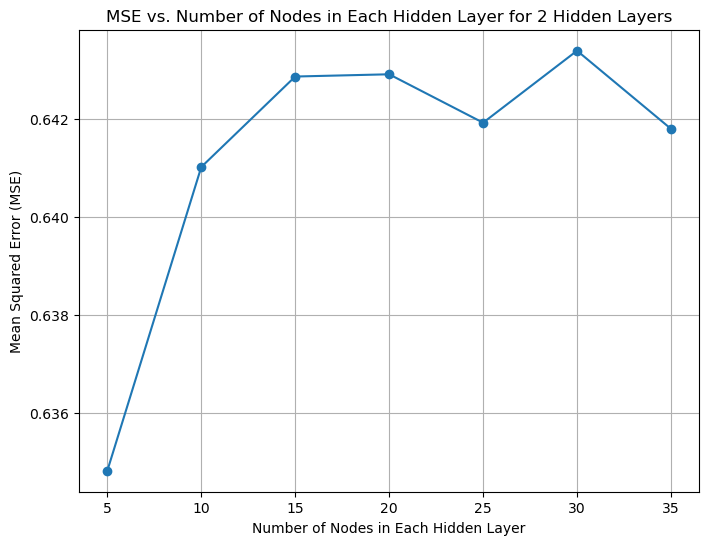

Configuration: 3 hidden layers with 5 nodes each
Mean Squared Error: 0.634
Mean Absolute Percentage Error: 15.3%
Explained Variance Score: 0.059
--------------------------------------------------
Configuration: 3 hidden layers with 10 nodes each
Mean Squared Error: 0.641
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 3 hidden layers with 15 nodes each
Mean Squared Error: 0.640
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 3 hidden layers with 20 nodes each
Mean Squared Error: 0.641
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 3 hidden layers with 25 nodes each
Mean Squared Error: 0.639
Mean Absolute Percentage Error: 15.3%
Explained Variance Score: 0.049
--------------------------------------------------
Configuration: 3

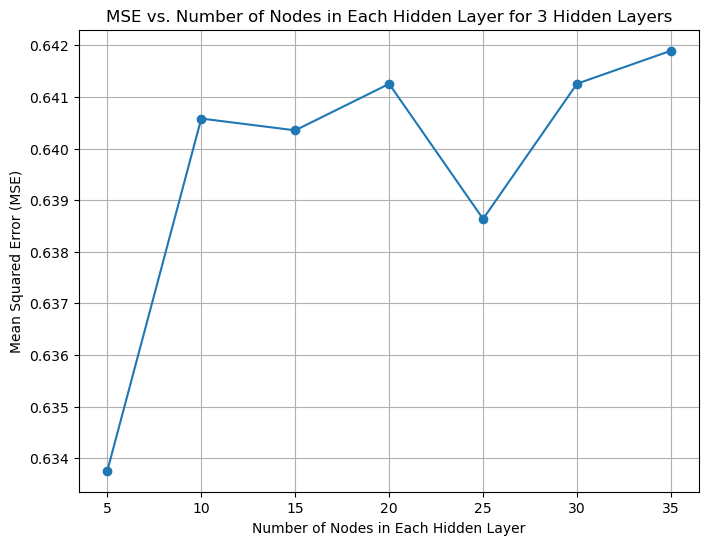

Configuration: 4 hidden layers with 5 nodes each
Mean Squared Error: 0.671
Mean Absolute Percentage Error: 15.8%
Explained Variance Score: 0.000
--------------------------------------------------
Configuration: 4 hidden layers with 10 nodes each
Mean Squared Error: 0.640
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.049
--------------------------------------------------
Configuration: 4 hidden layers with 15 nodes each
Mean Squared Error: 0.641
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.047
--------------------------------------------------
Configuration: 4 hidden layers with 20 nodes each
Mean Squared Error: 0.643
Mean Absolute Percentage Error: 15.5%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 4 hidden layers with 25 nodes each
Mean Squared Error: 0.645
Mean Absolute Percentage Error: 15.5%
Explained Variance Score: 0.048
--------------------------------------------------
Configuration: 4

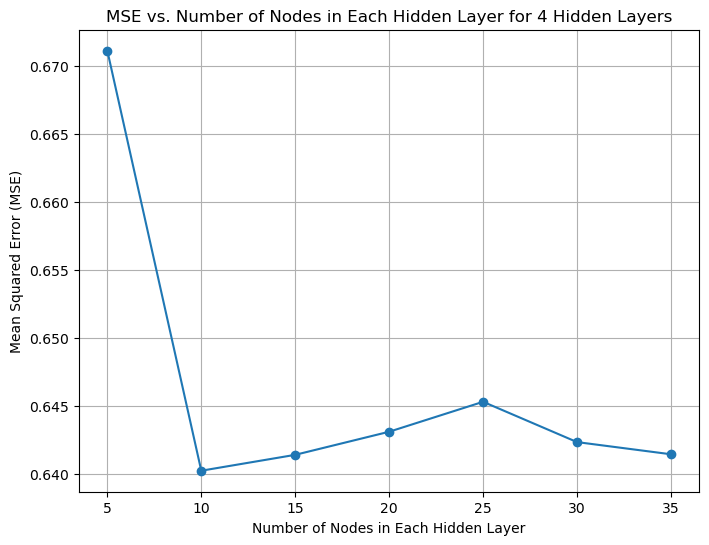

In [115]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt

# Load the hairdryer dataset.
data = read_csv('data/hairdryer.csv')

# Define the input and output columns, as well as the input variable names.
input_col = 'Voltage' # The first column as input (Voltage).
output_col = 'Temperature' # The second column as output (Temperature).
var_names = [input_col] # List of input variable names (only one input variable name).

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the SISO system.
X = data[:, 0].reshape(-1, 1) # Single input feature.
y = data[:, 1] # Single output variable.

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Define the range of hidden layers and nodes.
hidden_layer_options = [2, 3, 4] # Number of hidden layers.
node_options = [5, 10, 15, 20, 25, 30, 35] # Number of nodes in each hidden layer.

# Loop over the number of hidden layers.
for num_layers in hidden_layer_options:
    mse_values = [] # List to store the MSE values for the current number of hidden layers.

    # Loop over the number of nodes in each hidden layer.
    for num_nodes in node_options:
        # Create a tuple representing the configuration of the model.
        hidden_layer_sizes = tuple([num_nodes]*num_layers)

        # Train the model.
        regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, random_state = 42, max_iter = 500)
        regr.fit(X_train, y_train)

        # Get the model predictions.
        y_pred = regr.predict(X_test)

        # Print the configuration of the model.
        print(f'Configuration: {num_layers} hidden layers with {num_nodes} nodes each')


        # Compute the regression metrics.

        mse = mean_squared_error(y_test, y_pred)
        print('Mean Squared Error: {:.3f}'.format(mse))

        mape = mean_absolute_percentage_error(y_test, y_pred)
        print('Mean Absolute Percentage Error: {:.1f}%'.format(mape*100))

        exp_var = explained_variance_score(y_test, y_pred)
        print('Explained Variance Score: {:.3f}'.format(exp_var))

        print('-'*50)

        # Append the MSE value for the current configuration.
        mse_values.append(mse)
    
    # Plot the MSE vs. Number of Nodes in Each Hidden Layer for the current number of hidden layers.
    plt.figure(figsize = (8, 6))
    plt.plot(node_options, mse_values, marker = 'o', label = f'{num_layers} hidden layers')
    plt.title(f'MSE vs. Number of Nodes in Each Hidden Layer for {num_layers} Hidden Layers')
    plt.xlabel('Number of Nodes in Each Hidden Layer')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.xticks(node_options)
    plt.show()

### Neural Network Model - Best Model Configurations

For **2 hidden layers** and `random_state = 42`, the best configuration also seems to be approximately 25 nodes in each hidden layer.

In [116]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Load the hairdryer dataset.
data = read_csv('data/hairdryer.csv')

# Define the input and output columns, as well as the input variable names.
input_col = 'Voltage' # The first column as input (Voltage).
output_col = 'Temperature' # The second column as output (Temperature).
var_names = [input_col] # List of input variable names (only one input variable name).

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the SISO system.
X = data[:, 0].reshape(-1, 1) # Single input feature.
y = data[:, 1] # Single output variable.

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
regr = MLPRegressor(hidden_layer_sizes = (25, 25), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 2 hidden layers with 25 nodes each')


# Compute the regression metrics.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.3f}'.format(mse))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error: {:.1f}%'.format(mape*100))

exp_var = explained_variance_score(y_test, y_pred)
print('Explained Variance Score: {:.3f}'.format(exp_var))

Configuration: 2 hidden layers with 25 nodes each
Mean Squared Error: 0.642
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.049


In [117]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Load the hairdryer dataset.
data = read_csv('data/hairdryer.csv')

# Define the input and output columns, as well as the input variable names.
input_col = 'Voltage' # The first column as input (Voltage).
output_col = 'Temperature' # The second column as output (Temperature).
var_names = [input_col] # List of input variable names (only one input variable name).

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the SISO system.
X = data[:, 0].reshape(-1, 1) # Single input feature.
y = data[:, 1] # Single output variable.

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
regr = MLPRegressor(hidden_layer_sizes = (25, 25, 25), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 3 hidden layers with 25 nodes each')


# Compute the regression metrics.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.3f}'.format(mse))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error: {:.1f}%'.format(mape*100))

exp_var = explained_variance_score(y_test, y_pred)
print('Explained Variance Score: {:.3f}'.format(exp_var))

Configuration: 3 hidden layers with 25 nodes each
Mean Squared Error: 0.639
Mean Absolute Percentage Error: 15.3%
Explained Variance Score: 0.049


Similarly, for **3 hidden layers** and `random_state = 42`, the best configuration seems to be approximately 25 nodes in each hidden layer.

While there are other configurations with smaller MSE values, these configurations provides a good balance between model complexity and performance.

For **4 hidden layers** and `random_state = 42`, the best configuration seems to be approximately 10 nodes in each hidden layer.

In [118]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score

# Load the hairdryer dataset.
data = read_csv('data/hairdryer.csv')

# Define the input and output columns, as well as the input variable names.
input_col = 'Voltage' # The first column as input (Voltage).
output_col = 'Temperature' # The second column as output (Temperature).
var_names = [input_col] # List of input variable names (only one input variable name).

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the SISO system.
X = data[:, 0].reshape(-1, 1) # Single input feature.
y = data[:, 1] # Single output variable.

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
regr = MLPRegressor(hidden_layer_sizes = (10, 10, 10, 10), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 4 hidden layers with 10 nodes each')


# Compute the regression metrics.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.3f}'.format(mse))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error: {:.1f}%'.format(mape*100))

exp_var = explained_variance_score(y_test, y_pred)
print('Explained Variance Score: {:.3f}'.format(exp_var))

Configuration: 4 hidden layers with 10 nodes each
Mean Squared Error: 0.640
Mean Absolute Percentage Error: 15.4%
Explained Variance Score: 0.049


The MSE drops significantly around 10 nodes and stabilizes with minor fluctuations after that. Adding more nodes does not significantly improve performance, suggesting the model has reached the saturation plateau.

## Wisconsin Breast Cancer Original Dataset Problem

This is a **binary classification** problem.

### Neural Network Model - Finding the Best Model Configurations

Configuration: 3 hidden layers with 21 nodes each
Accuracy: 0.957
Recall: 0.875
Precision Score: 1.000
F1-Score: 0.933
Kappa Score: 0.902
--------------------------------------------------
Configuration: 3 hidden layers with 26 nodes each
Accuracy: 0.943
Recall: 0.875
Precision Score: 0.955
F1-Score: 0.913
Kappa Score: 0.871
--------------------------------------------------
Configuration: 3 hidden layers with 31 nodes each
Accuracy: 0.957
Recall: 0.896
Precision Score: 0.977
F1-Score: 0.935
Kappa Score: 0.903
--------------------------------------------------
Configuration: 3 hidden layers with 36 nodes each
Accuracy: 0.957
Recall: 0.896
Precision Score: 0.977
F1-Score: 0.935
Kappa Score: 0.903
--------------------------------------------------
Configuration: 3 hidden layers with 41 nodes each
Accuracy: 0.964
Recall: 0.896
Precision Score: 1.000
F1-Score: 0.945
Kappa Score: 0.919
--------------------------------------------------
Configuration: 3 hidden layers with 46 nodes each
Accur

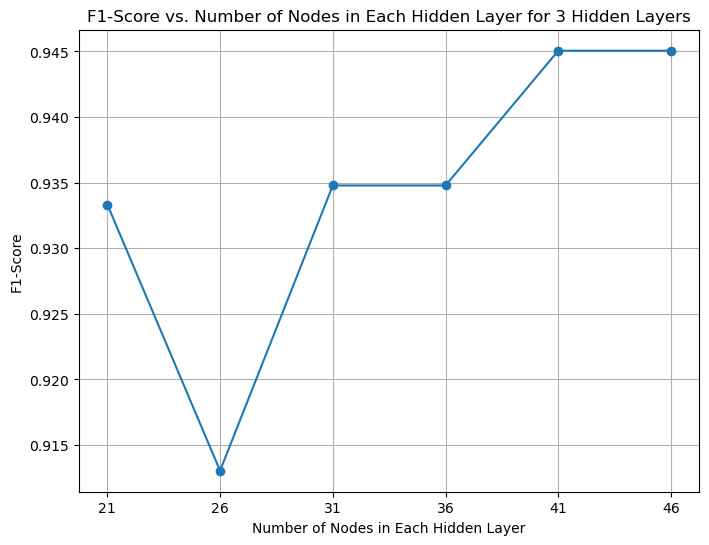

Configuration: 4 hidden layers with 21 nodes each
Accuracy: 0.914
Recall: 0.812
Precision Score: 0.929
F1-Score: 0.867
Kappa Score: 0.804
--------------------------------------------------
Configuration: 4 hidden layers with 26 nodes each
Accuracy: 0.936
Recall: 0.854
Precision Score: 0.953
F1-Score: 0.901
Kappa Score: 0.854
--------------------------------------------------
Configuration: 4 hidden layers with 31 nodes each
Accuracy: 0.964
Recall: 0.896
Precision Score: 1.000
F1-Score: 0.945
Kappa Score: 0.919
--------------------------------------------------
Configuration: 4 hidden layers with 36 nodes each
Accuracy: 0.929
Recall: 0.833
Precision Score: 0.952
F1-Score: 0.889
Kappa Score: 0.837
--------------------------------------------------
Configuration: 4 hidden layers with 41 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
--------------------------------------------------
Configuration: 4 hidden layers with 46 nodes each
Accur

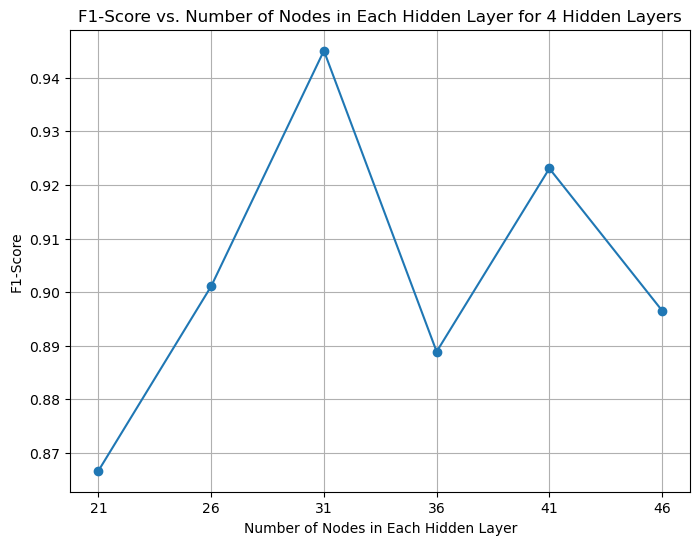

Configuration: 5 hidden layers with 21 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
--------------------------------------------------
Configuration: 5 hidden layers with 26 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
--------------------------------------------------
Configuration: 5 hidden layers with 31 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
--------------------------------------------------
Configuration: 5 hidden layers with 36 nodes each
Accuracy: 0.943
Recall: 0.854
Precision Score: 0.976
F1-Score: 0.911
Kappa Score: 0.869
--------------------------------------------------
Configuration: 5 hidden layers with 41 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
--------------------------------------------------
Configuration: 5 hidden layers with 46 nodes each
Accur

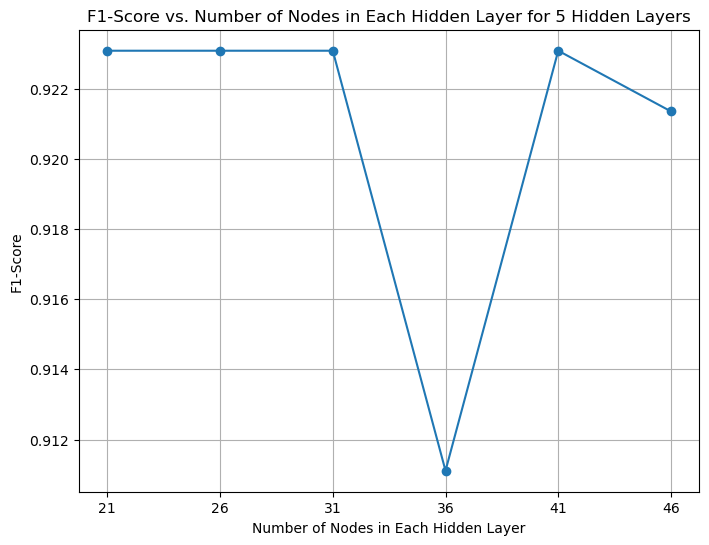

In [126]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt

# Load the Wisconsin Breast Cancer Original dataset.
data = read_csv('data/wbco.csv')

# Convert non-numeric values to NaN using a function that tries to convert values to float.
data = data.apply(pd.to_numeric, errors = 'coerce')

# # Drop rows with any NaN values.
# data.dropna(inplace = True)

# Replace missing values with the mean of the respective columns.
data.fillna(data.mean(), inplace = True)

# Define the input and output columns, as well as the input variable names.
input_cols = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
              'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9'] # The first 9 columns as input features.
output_col = 'Cancer Presence' # The last column as output (Cancer Presence).
var_names = input_cols # List of input variable names.
var_names = [var_names[i].title().replace(' ', '') for i in range(0, len(var_names))] # Convert each input variable name to title case and remove spaces.

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the classification problem.
X = data[:, :-1] # All columns except the last one as input features.
y = data[:, -1] # The last column as the output variable (Cancer Presence).

# Splitting into training and test sets (ensuring class distribution is preserved).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Define the range of hidden layers and nodes.
hidden_layer_options = [3, 4, 5] # Number of hidden layers.
node_options = [21, 26, 31, 36, 41, 46] # Number of nodes in each hidden layer.

# Loop over the number of hidden layers.
for num_layers in hidden_layer_options:
    F1_score_values = [] # List to store the accuracy values for the current number of hidden layers.

    # Loop over the number of nodes in each hidden layer.
    for num_nodes in node_options:
        # Create a tuple representing the configuration of the model.
        hidden_layer_sizes = tuple([num_nodes]*num_layers)

        # Train the model.
        regr = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, random_state = 42, max_iter = 500)
        regr.fit(X_train, y_train)

        # Get the model predictions.
        y_pred = regr.predict(X_test)

        # Print the configuration of the model.
        print(f'Configuration: {num_layers} hidden layers with {num_nodes} nodes each')


        # Compute the classification metrics.

        acc_score = accuracy_score(y_test, y_pred)
        print('Accuracy: {:.3f}'.format(acc_score))

        rec_score = recall_score(y_test, y_pred)
        print('Recall: {:.3f}'.format(rec_score))

        prec_score = precision_score(y_test, y_pred)
        print('Precision Score: {:.3f}'.format(prec_score))

        F1_score = f1_score(y_test, y_pred)
        print('F1-Score: {:.3f}'.format(F1_score))

        kappa = cohen_kappa_score(y_test, y_pred)
        print('Kappa Score: {:.3f}'.format(kappa))

        print('-'*50)

        # Append the accuracy value for the current configuration.
        F1_score_values.append(F1_score)

    # Plot the F1-Score vs. Number of Nodes in Each Hidden Layer for the current number of hidden layers.
    plt.figure(figsize = (8, 6))
    plt.plot(node_options, F1_score_values, marker = 'o', label = f'{num_layers} hidden layers')
    plt.title(f'F1-Score vs. Number of Nodes in Each Hidden Layer for {num_layers} Hidden Layers')
    plt.xlabel('Number of Nodes in Each Hidden Layer')
    plt.ylabel('F1-Score')
    plt.grid(True)
    plt.xticks(node_options)
    plt.show()

### Neural Network Model - Best Model Configurations

For **3 hidden layers** and `random_state = 42`, the best configuration also seems to be approximately 41 nodes in each hidden layer.

In [128]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score

# Load the Wisconsin Breast Cancer Original dataset.
data = read_csv('data/wbco.csv')

# Convert non-numeric values to NaN using a function that tries to convert values to float.
data = data.apply(pd.to_numeric, errors = 'coerce')

# # Drop rows with any NaN values.
# data.dropna(inplace = True)

# Replace missing values with the mean of the respective columns.
data.fillna(data.mean(), inplace = True)

# Define the input and output columns, as well as the input variable names.
input_cols = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
              'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9'] # The first 9 columns as input features.
output_col = 'Cancer Presence' # The last column as output (Cancer Presence).
var_names = input_cols # List of input variable names.
var_names = [var_names[i].title().replace(' ', '') for i in range(0, len(var_names))] # Convert each input variable name to title case and remove spaces.

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the classification problem.
X = data[:, :-1] # All columns except the last one as input features.
y = data[:, -1] # The last column as the output variable (Cancer Presence).

# Splitting into training and test sets (ensuring class distribution is preserved).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Train the model.
regr = MLPClassifier(hidden_layer_sizes = (41, 41, 41), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 3 hidden layers with 41 nodes each')


# Compute the classification metrics.

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(acc_score))

rec_score = recall_score(y_test, y_pred)
print('Recall: {:.3f}'.format(rec_score))

prec_score = precision_score(y_test, y_pred)
print('Precision Score: {:.3f}'.format(prec_score))

F1_score = f1_score(y_test, y_pred)
print('F1-Score: {:.3f}'.format(F1_score))

kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa Score: {:.3f}'.format(kappa))

Configuration: 3 hidden layers with 41 nodes each
Accuracy: 0.964
Recall: 0.896
Precision Score: 1.000
F1-Score: 0.945
Kappa Score: 0.919


For **4 hidden layers** and `random_state = 42`, the best configuration also seems to be approximately 31 nodes in each hidden layer.

In [133]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score

# Load the Wisconsin Breast Cancer Original dataset.
data = read_csv('data/wbco.csv')

# Convert non-numeric values to NaN using a function that tries to convert values to float.
data = data.apply(pd.to_numeric, errors = 'coerce')

# # Drop rows with any NaN values.
# data.dropna(inplace = True)

# Replace missing values with the mean of the respective columns.
data.fillna(data.mean(), inplace = True)

# Define the input and output columns, as well as the input variable names.
input_cols = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
              'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9'] # The first 9 columns as input features.
output_col = 'Cancer Presence' # The last column as output (Cancer Presence).
var_names = input_cols # List of input variable names.
var_names = [var_names[i].title().replace(' ', '') for i in range(0, len(var_names))] # Convert each input variable name to title case and remove spaces.

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the classification problem.
X = data[:, :-1] # All columns except the last one as input features.
y = data[:, -1] # The last column as the output variable (Cancer Presence).

# Splitting into training and test sets (ensuring class distribution is preserved).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Train the model.
regr = MLPClassifier(hidden_layer_sizes = (31, 31, 31, 31), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 4 hidden layers with 31 nodes each')


# Compute the classification metrics.

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(acc_score))

rec_score = recall_score(y_test, y_pred)
print('Recall: {:.3f}'.format(rec_score))

prec_score = precision_score(y_test, y_pred)
print('Precision Score: {:.3f}'.format(prec_score))

F1_score = f1_score(y_test, y_pred)
print('F1-Score: {:.3f}'.format(F1_score))

kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa Score: {:.3f}'.format(kappa))

Configuration: 4 hidden layers with 31 nodes each
Accuracy: 0.964
Recall: 0.896
Precision Score: 1.000
F1-Score: 0.945
Kappa Score: 0.919


For **5 hidden layers** and `random_state = 42`, the best configuration also seems to be approximately 21 nodes in each hidden layer.

In [132]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score

# Load the Wisconsin Breast Cancer Original dataset.
data = read_csv('data/wbco.csv')

# Convert non-numeric values to NaN using a function that tries to convert values to float.
data = data.apply(pd.to_numeric, errors = 'coerce')

# # Drop rows with any NaN values.
# data.dropna(inplace = True)

# Replace missing values with the mean of the respective columns.
data.fillna(data.mean(), inplace = True)

# Define the input and output columns, as well as the input variable names.
input_cols = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
              'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9'] # The first 9 columns as input features.
output_col = 'Cancer Presence' # The last column as output (Cancer Presence).
var_names = input_cols # List of input variable names.
var_names = [var_names[i].title().replace(' ', '') for i in range(0, len(var_names))] # Convert each input variable name to title case and remove spaces.

# Convert the dataset to a numpy array.
data = data.to_numpy()

# Assign the X and y for the classification problem.
X = data[:, :-1] # All columns except the last one as input features.
y = data[:, -1] # The last column as the output variable (Cancer Presence).

# Splitting into training and test sets (ensuring class distribution is preserved).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Train the model.
regr = MLPClassifier(hidden_layer_sizes = (21, 21, 21, 21, 21), random_state = 42, max_iter = 500)
regr.fit(X_train, y_train)

# Get the model predictions.
y_pred = regr.predict(X_test)

# Print the configuration of the model.
print(f'Configuration: 5 hidden layers with 21 nodes each')


# Compute the classification metrics.

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(acc_score))

rec_score = recall_score(y_test, y_pred)
print('Recall: {:.3f}'.format(rec_score))

prec_score = precision_score(y_test, y_pred)
print('Precision Score: {:.3f}'.format(prec_score))

F1_score = f1_score(y_test, y_pred)
print('F1-Score: {:.3f}'.format(F1_score))

kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa Score: {:.3f}'.format(kappa))

Configuration: 5 hidden layers with 21 nodes each
Accuracy: 0.950
Recall: 0.875
Precision Score: 0.977
F1-Score: 0.923
Kappa Score: 0.886
